In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [8]:
df_train = pd.read_csv('WDBC_PCA10_Train.csv')
df_valid = pd.read_csv('WDBC_PCA10_Validation.csv')
df_test = pd.read_csv('WDBC_PCA10_Test.csv')

In [9]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

X_valid = df_valid.iloc[:,1:]
y_valid = df_valid.iloc[:,0]

X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [10]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_test_pred = logistic_reg.predict(X_test)
y_valid_pred=logistic_reg.predict(X_valid)

/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


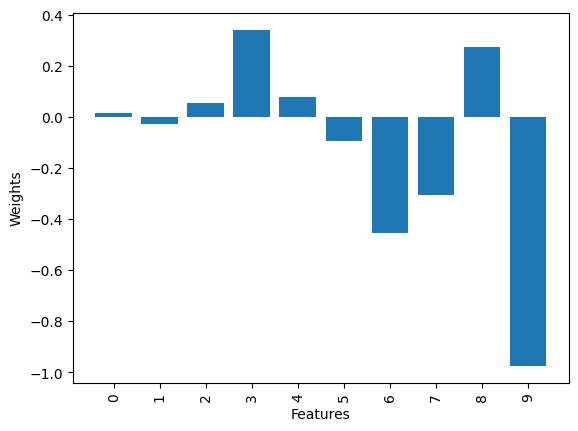

In [11]:
features = X_train.columns.tolist()
weights = logistic_reg.coef_[0]

plt.bar(features, weights)
plt.xlabel("Features")
plt.ylabel("Weights")
plt.xticks(rotation=90)
plt.show()

In [12]:
def performance(model_name, y_true, y_pred):
    print(f"Performance for {model_name}:\n")
    print(f"Confusion matrix: \n{confusion_matrix(y_true,y_pred)}")
    print(f"Accuracy: \t{accuracy_score(y_true, y_pred)}")
    print(f"Precision: \t{precision_score(y_true, y_pred)}")
    print(f"Recall: \t{recall_score(y_true, y_pred)}")
    print(f"F1-score: \t{f1_score(y_true, y_pred)}\n\n")

performance("Validation data", y_valid, y_valid_pred)
performance("Test data", y_test, y_test_pred)

Performance for Validation data:

Confusion matrix: 
[[70  1]
 [ 3 40]]
Accuracy: 	0.9649122807017544
Precision: 	0.975609756097561
Recall: 	0.9302325581395349
F1-score: 	0.9523809523809524


Performance for Test data:

Confusion matrix: 
[[69  3]
 [ 3 39]]
Accuracy: 	0.9473684210526315
Precision: 	0.9285714285714286
Recall: 	0.9285714285714286
F1-score: 	0.9285714285714286


